In [1]:
import numpy as np
from mlalgos.metrics import confusion_matrix

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

expected_precision = np.array([0.5, 0.66666667, 0.5, 1, 1])
expected_recall = np.array([1, 1, 0.5, 0.5, 0])
expected_thresholds = np.array([0.1 , 0.35, 0.4 , 0.8])

In [4]:
from typing import Optional
import numpy as np

from mlalgos.metrics import confusion_matrix

def precision_recall_curve(y_true: np.ndarray, y_scores: np.ndarray, pos_label: Optional[int] = None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if not pos_label:
        # check whether y_true is in {-1, 1} or {0, 1}, otherwise raise a value error
        pass

    precision: list[float] = []
    recall: list[float] = []
    thresholds = np.sort(y_scores)

    for threshold in thresholds:
        predictions = np.array([1 if score >= threshold else 0 for score in y_scores]) # use pos_label

        cf_matrix = confusion_matrix(y_true, predictions, class_labels=[1, 0]) # use pos_label

        tp = cf_matrix[0][0]
        fp = cf_matrix[1][0]
        fn = cf_matrix[0][1]

        precision_value = tp / (tp + fp)
        recall_value = tp / (tp + fn)

        precision.append(precision_value)
        recall.append(recall_value)

    precision.append(1)
    recall.append(0)

    precision = np.asarray(precision)
    recall = np.asarray(recall)

    return precision, recall, thresholds

[0.5        0.66666667 0.5        1.         1.        ]
[1.  1.  0.5 0.5 0. ]
[0.1  0.35 0.4  0.8 ]


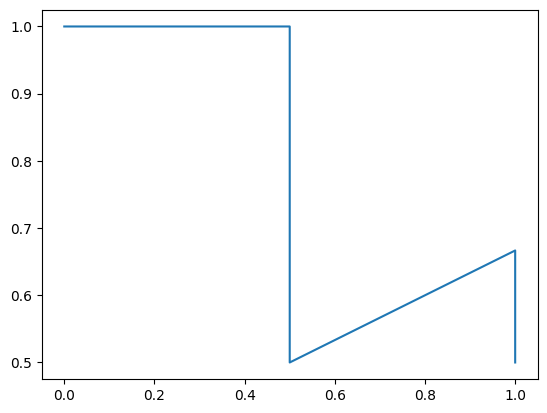

In [5]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

print(precision)
print(recall)
print(thresholds)

import matplotlib.pyplot as plt

plt.plot(recall, precision)

In [ ]:
y_scores = np.array([
    0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.90, 0.89,
    0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80, 0.79,
    0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.70, 0.69,
    0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.60, 0.59,
    0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.50, 0.49,
    0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.40, 0.39,
    0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.30, 0.29,
    0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.20, 0.19,
    0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.10, 0.09,
    0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.00
])

y_true = np.array([
    1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1
])


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision2, recall2, thresholds2 = precision_recall_curve2(y_true, y_scores)

In [ ]:
print(np.array_equal(precision, precision2))
print(np.array_equal(recall, recall2))
print(np.array_equal(thresholds, thresholds2))